# CEFET-RJ - UNED Nova Iguaçu  
![](logocefet.jpg)





## Dep. Engenharia de Controle e Automação

### Disciplina: Processamento Digital de Imagens

Professor: Gabriel Matos Araujo
<br>
Material de Aula (Conversão em Python)
<br>
Script escrito por Leonardo Martins Reigoto

<b> Original File Heading</b>
<br>

EE368/CS232 Digital Image Processing
<br>
Bernd Girod
<br>
Department of Electrical Engineering, Stanford University 
<br>
Script by Qiyuan Tian and David Chen
<br>
Non-uniform lighting compensation



Loading modules and image

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
#from scipy import signal <-travando
img=cv2.imread('paper.png',0)

Filter Function

In [2]:
def rank_filter(img,order,window_size):
    y,x=img.shape
    value=[]
    filtered_image=img.copy()
    for i in range (0,x):
        for j in range(0,y):
            if x<0 or y<0:
                continue
            for a in range(x-window_size,x+window_size):
                for b in range(y-window_size,y+window_size):
                    if a<0 or b<0:
                        value.append(0)
                    else:
                        value.append(img[j,i])
            np.sort(value)
            filtered_image[j,i]=value[order]
    return filtered_image

blablabla

In [3]:
kernel=np.ones((61,61),np.uint8)
img_dilated = cv2.dilate(img,kernel,iterations=1)
#filtered_img= signal.order_filter(img,kernel,kernel.size-21) <- travando
#img_nova=rank_filter(img,2,8) #tb trava<-
diffImg=img_dilated-img
kernel2 = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
diffImg_sharp = cv2.filter2D(diffImg, -1, kernel2)
diffImg3=cv2.bitwise_or(diffImg_sharp,diffImg)
ret,thresh=cv2.threshold(diffImg,125,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret,thresh2=cv2.threshold(diffImg3,125,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imshow('diffImg',diffImg)
cv2.imshow('thresh',thresh)
cv2.imshow('thresh2',thresh2)
cv2.imwrite('diff.png',diffImg)
cv2.imwrite('thresh.png',thresh)
cv2.imwrite('thresh2.png',thresh2)
cv2.waitKey()
cv2.destroyAllWindows()

Plotting the images

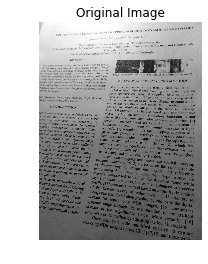

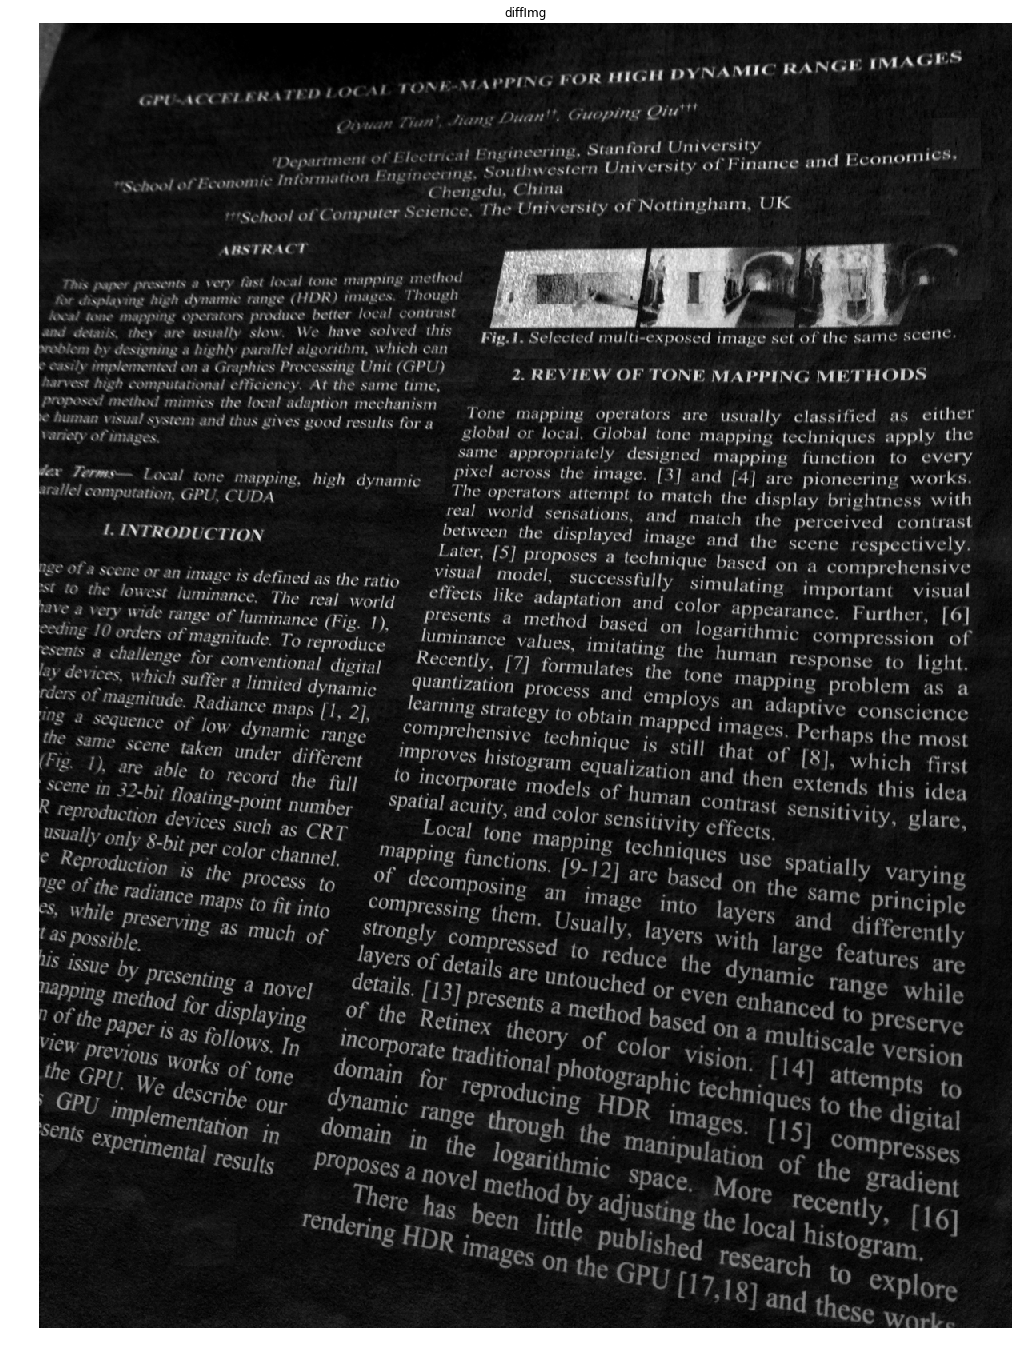

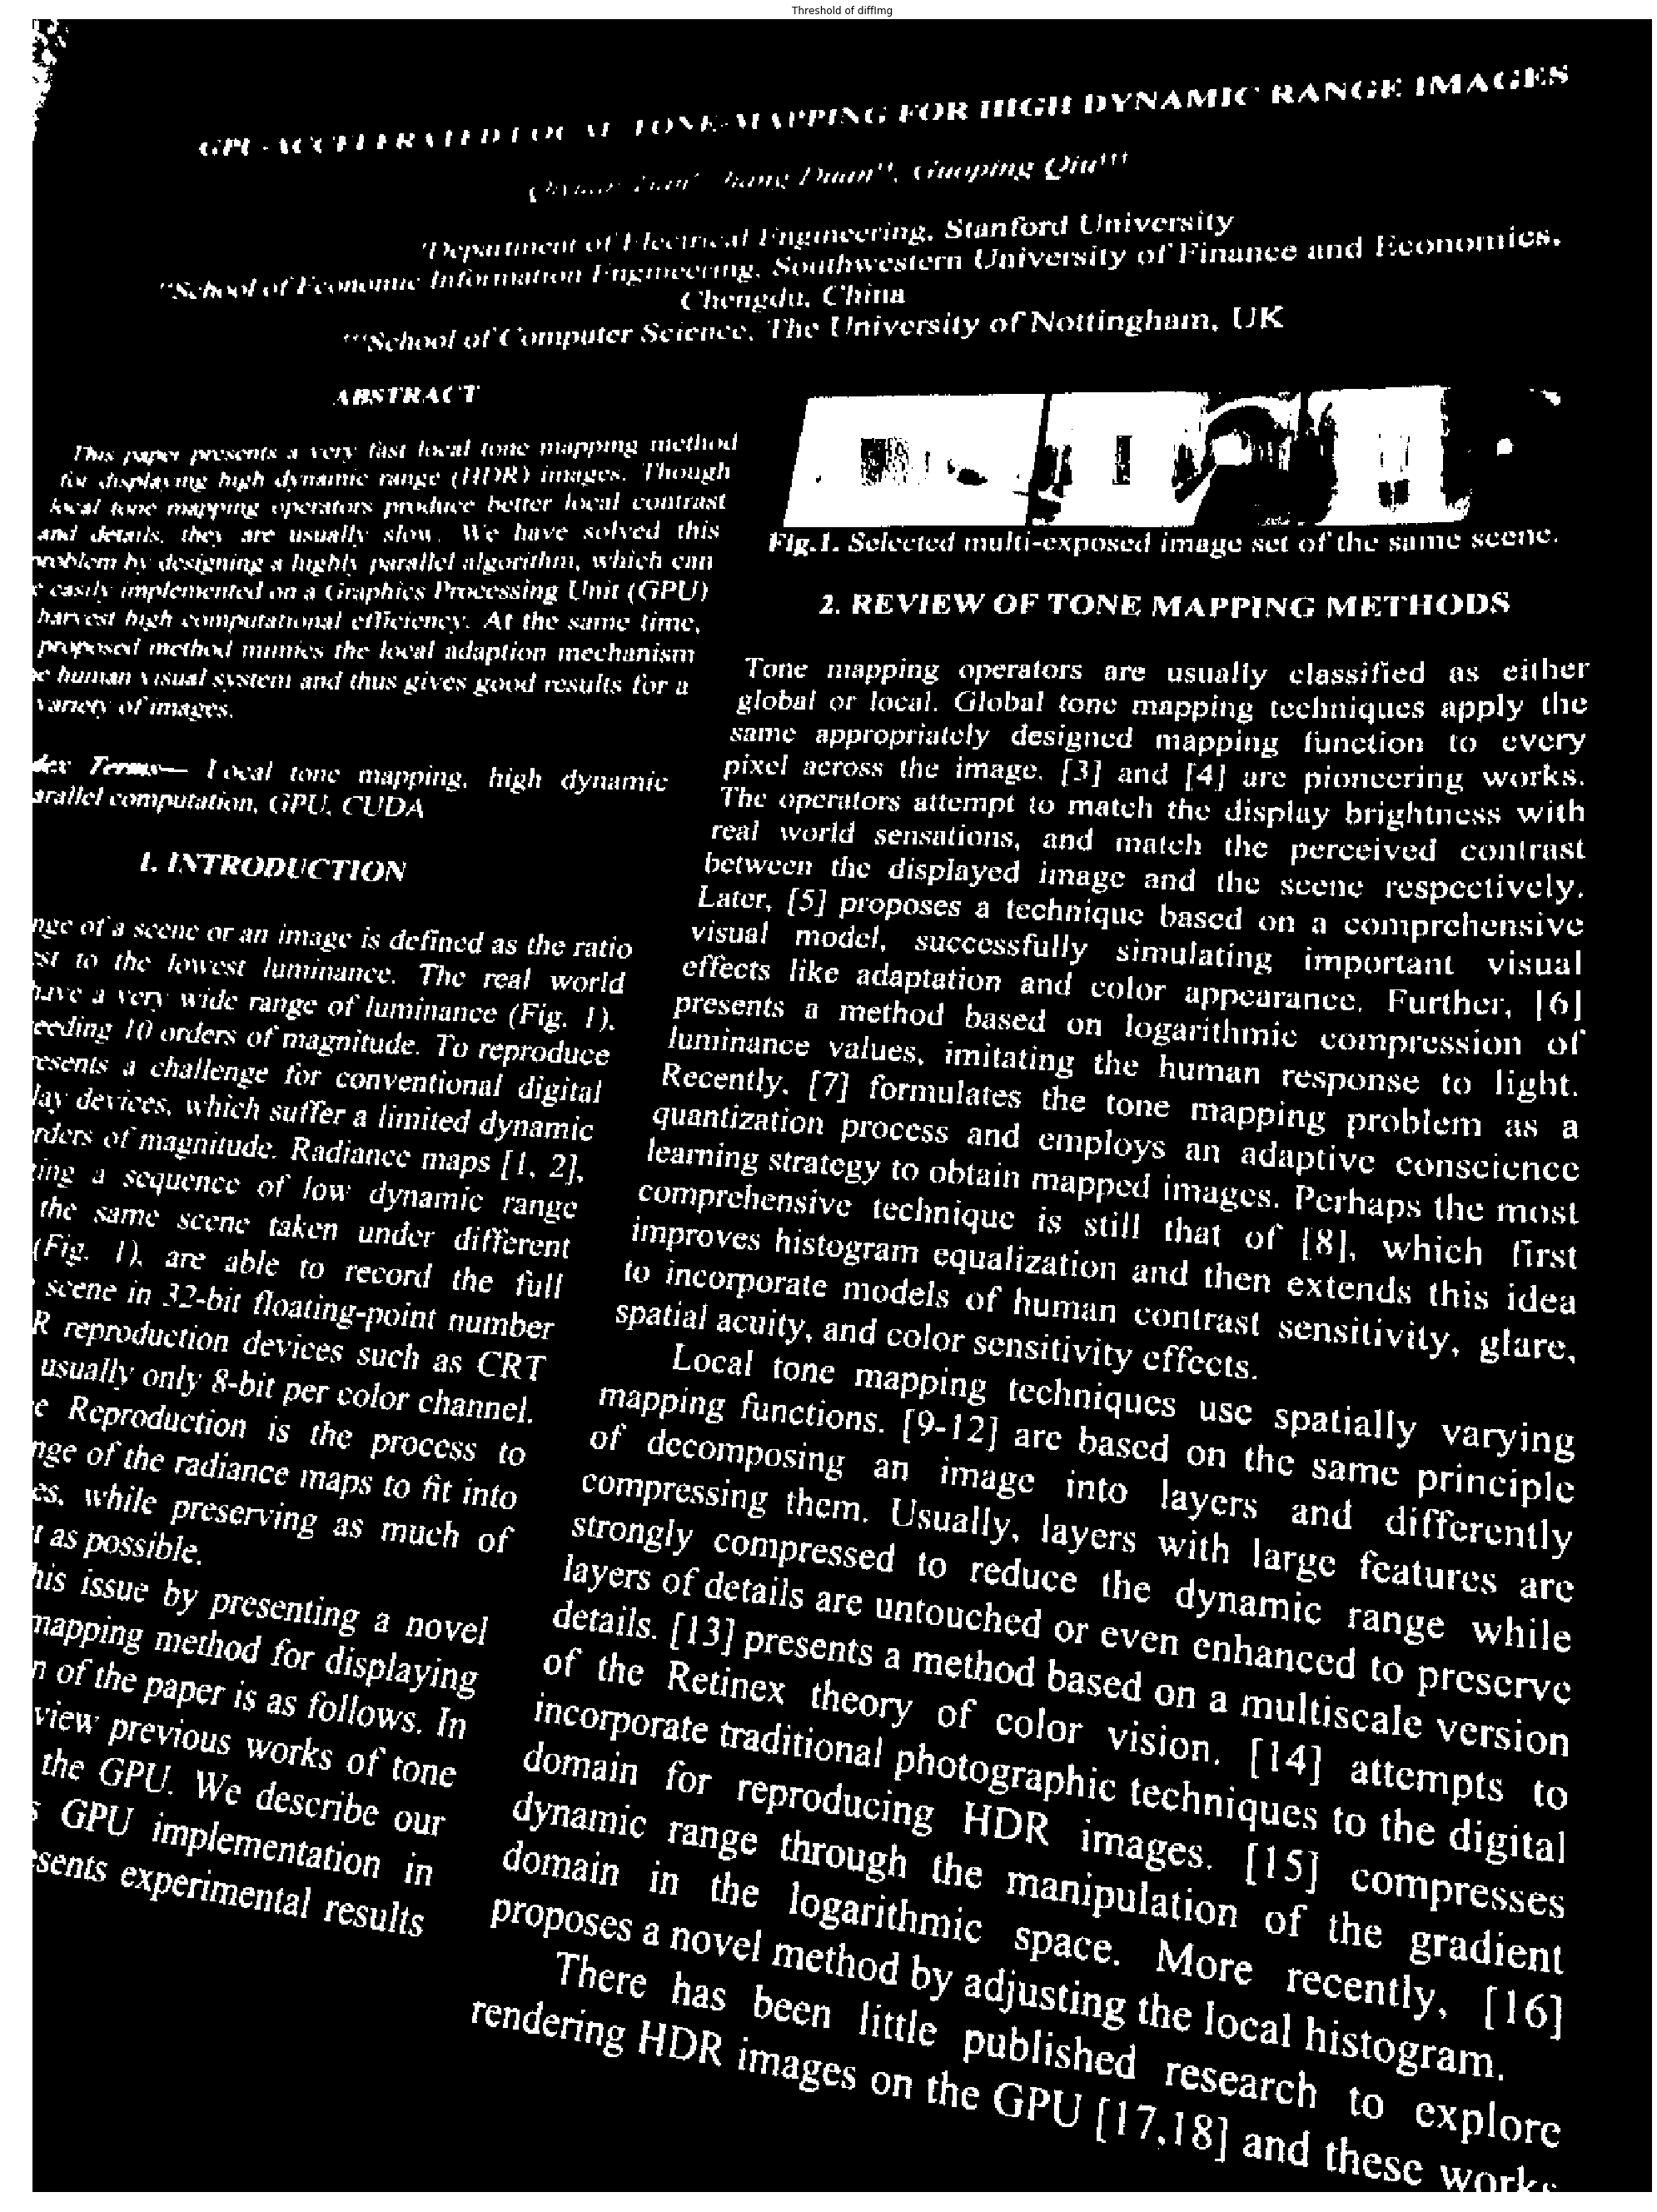

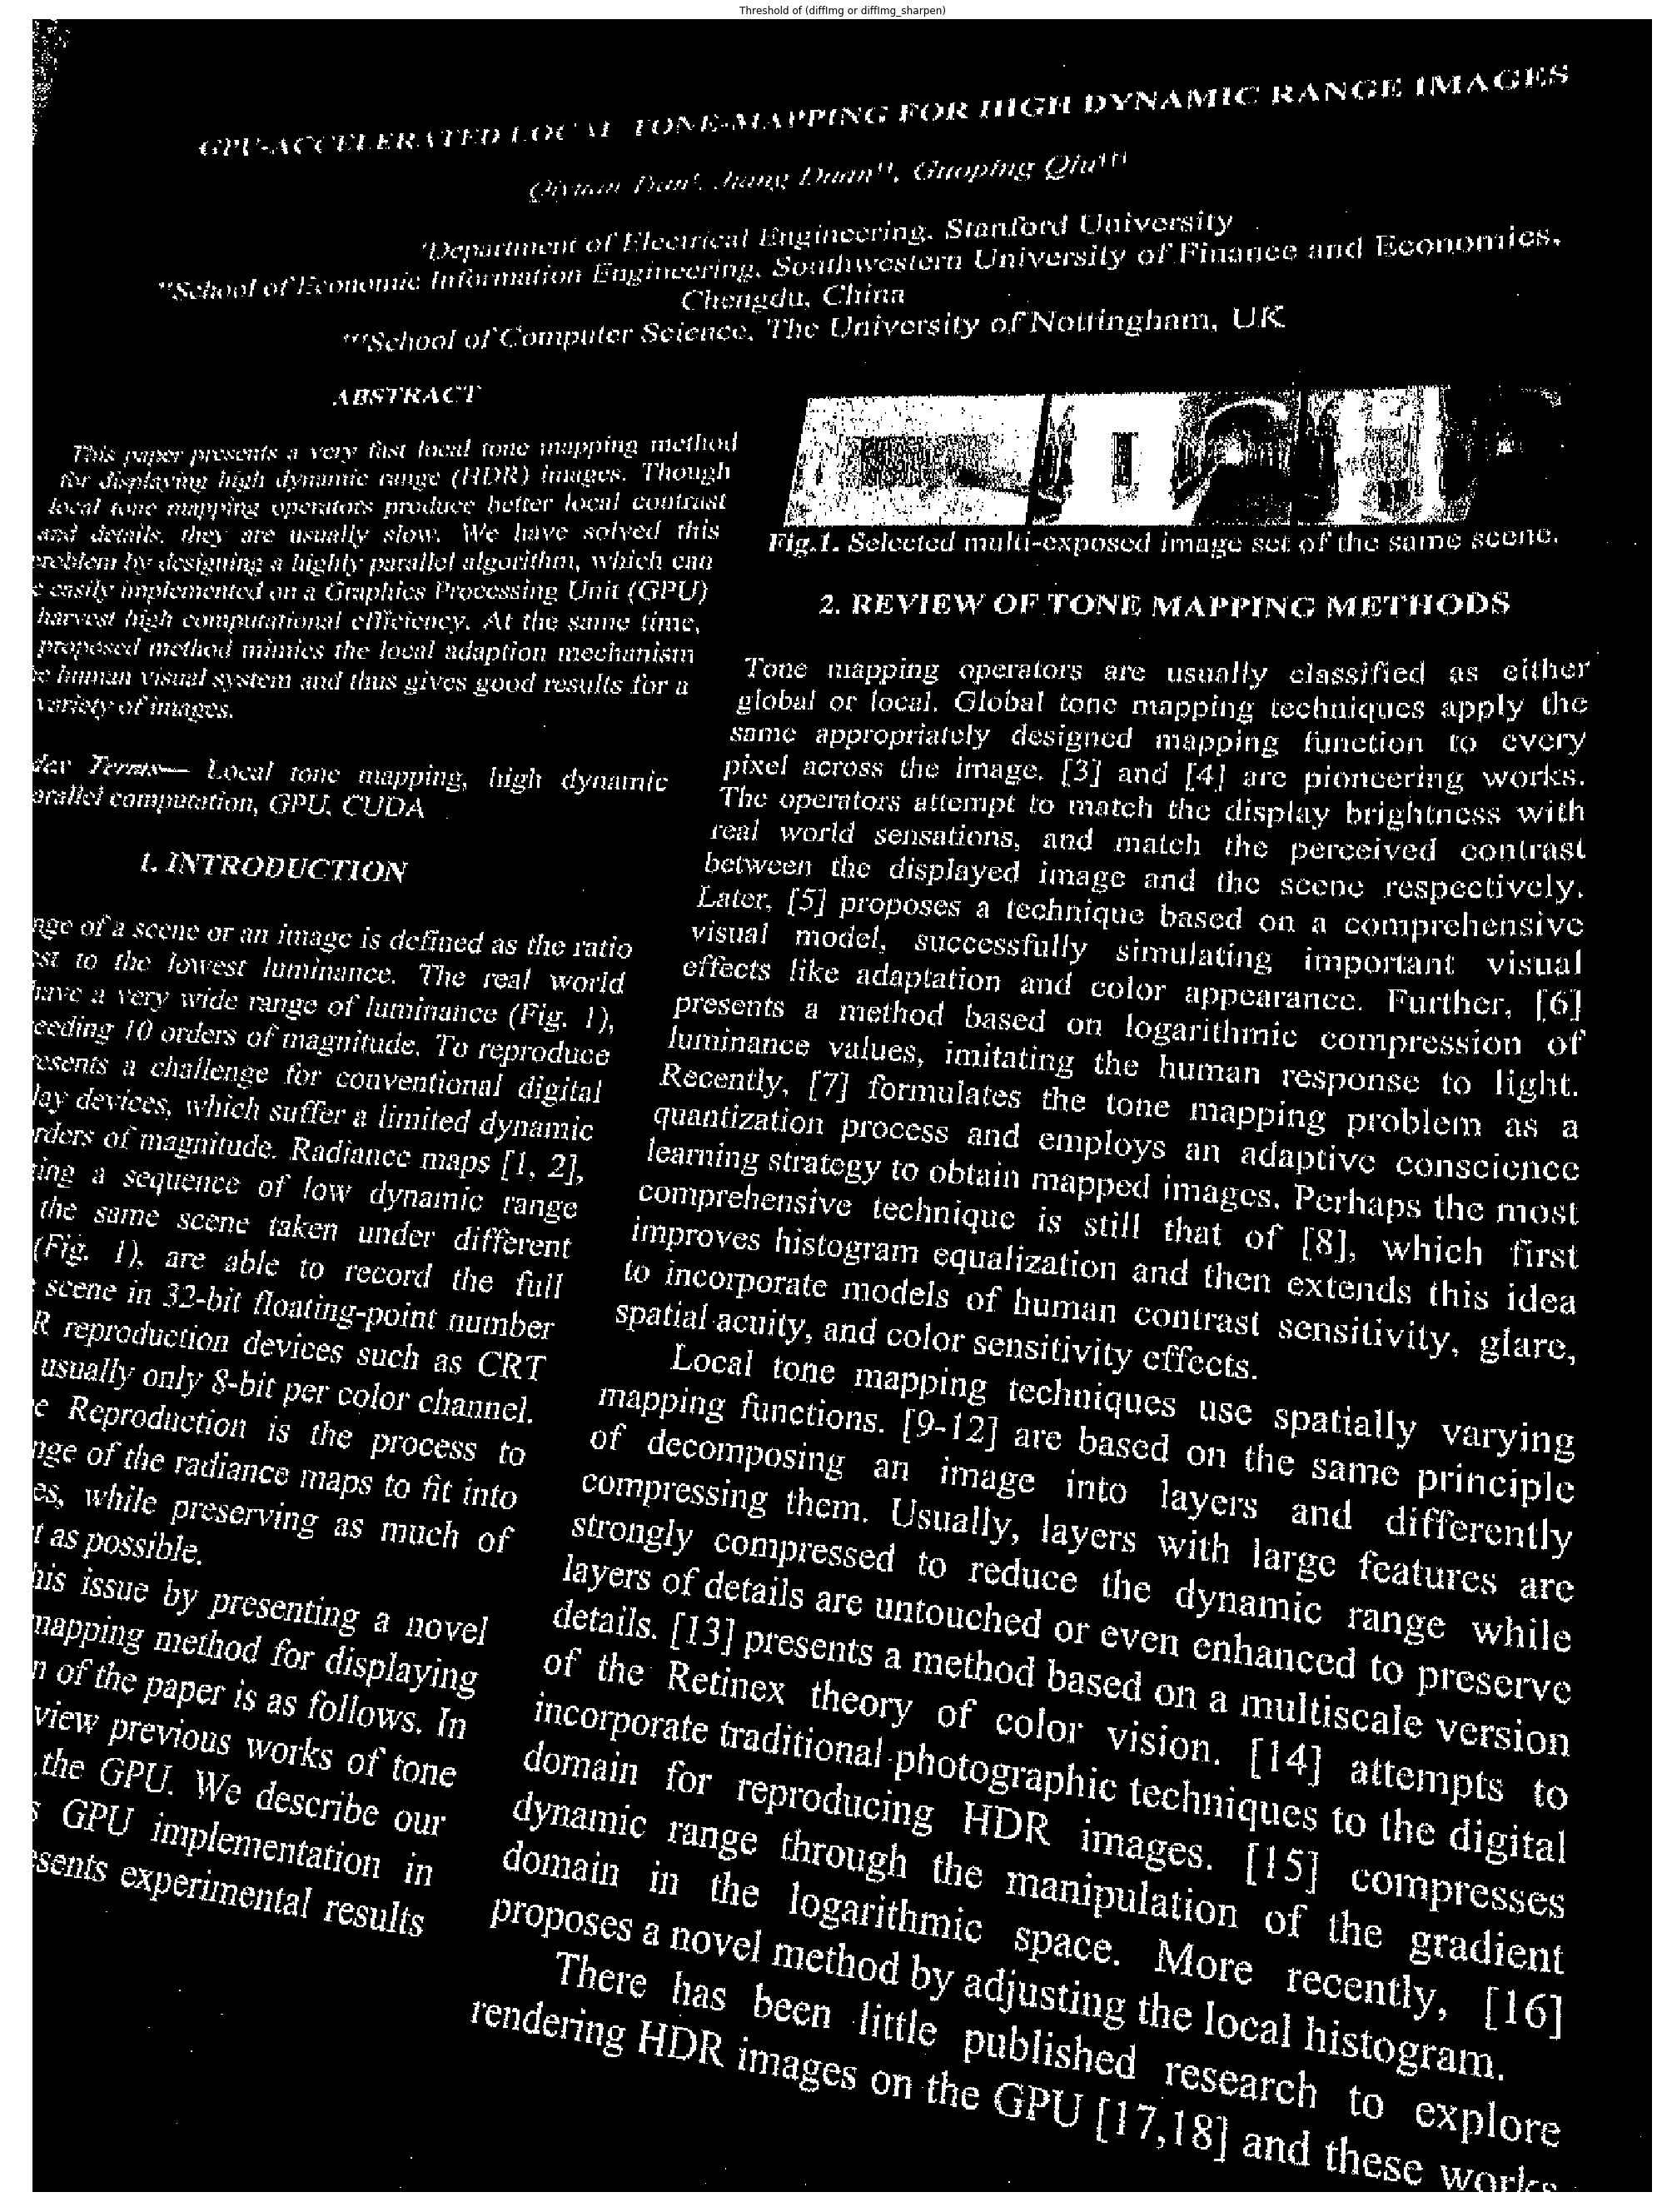

In [4]:
####a imagem do cv2.imshow está melhor que a do plt.imshow

plt.imshow(img,cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()
plt.figure(figsize=(32,24))
plt.imshow(diffImg,cmap='gray')
plt.title('diffImg')
plt.axis('off')
plt.show()
plt.figure(figsize=(64,48))
plt.imshow(thresh,cmap='gray')
plt.title('Threshold of diffImg')
plt.axis('off')
plt.show()
plt.figure(figsize=(64,48))
plt.imshow(thresh2,cmap='gray')
plt.title('Threshold of (diffImg or diffImg_sharpen)')
plt.axis('off')
plt.show()